In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
def meanAbsError(y_pred, y_true):
     return np.mean(np.abs(y_pred - y_true))

def meanAbsPercengeError(y_pred, y_true):
     return np.mean(np.abs(y_pred - y_true) / len(y_true)) * 100

In [76]:
class LinearRegressionOLS:
	def __init__(self):
		self.slope = None
		self.intercept = None 
		
	def fit(self, X, y):
		self.X_train = X
		self.y_train = y

	def predict(self):
		X_mean = self.X_train.mean()
		y_mean = self.y_train.mean()

		# slope = numerator / denominator = rise / run
		numerator = np.sum((self.X_train - X_mean) * (self.y_train - y_mean))
		denominator = np.sum((self.X_train - X_mean) ** 2)

		self.slope = numerator / denominator
		self.intercept = y_mean - self.slope * X_mean 

	def _predict(self, x):
		return self.slope * x + self.intercept

In [ ]:
class LinearRegressionGD:
     def __init__(self, learning_rate=0.1, epochs=100):
          self.lr = learning_rate
          self.epochs = epochs
          self.losses = []
          self.slope = 0.0
          self.intercept = 0.0
          
     def fit(self, X, y):
          self.X_train = X
          self.y_train = y
          n_samples = len(self.X_train)
          
          for iter in range(self.epochs):
               y_pred = self.slope * self.X_train + self.intercept
               
               # keeping track of the losses
               loss = (1 / n_samples) * np.sum((y_pred - self.y_train) ** 2)
               self.losses.append(loss)
               
               # calc the descent of slope and intercept
               # get the magnitude value that will be used to adjust slope
               descent_slope = -(2 / n_samples) * np.sum(self.X_train * (y_pred - self.y_train))
               # get the magnitude value that will be used to adjust slope
               descent_intercept = -(2 / n_samples) * np.sum(y_pred - self.y_train)
               
               self.slope -= self.lr * descent_slope
               self.slope -= self.lr * descent_intercept
               
          return y_pred
     
     def _predict(self, x):
          return self.slope * x + self.intercept
               

In [127]:
df = pd.read_csv("dataset/Food_Delivery_Time.csv")

In [78]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [80]:
object_columns = list(df.select_dtypes(include='object').columns)
object_columns

['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

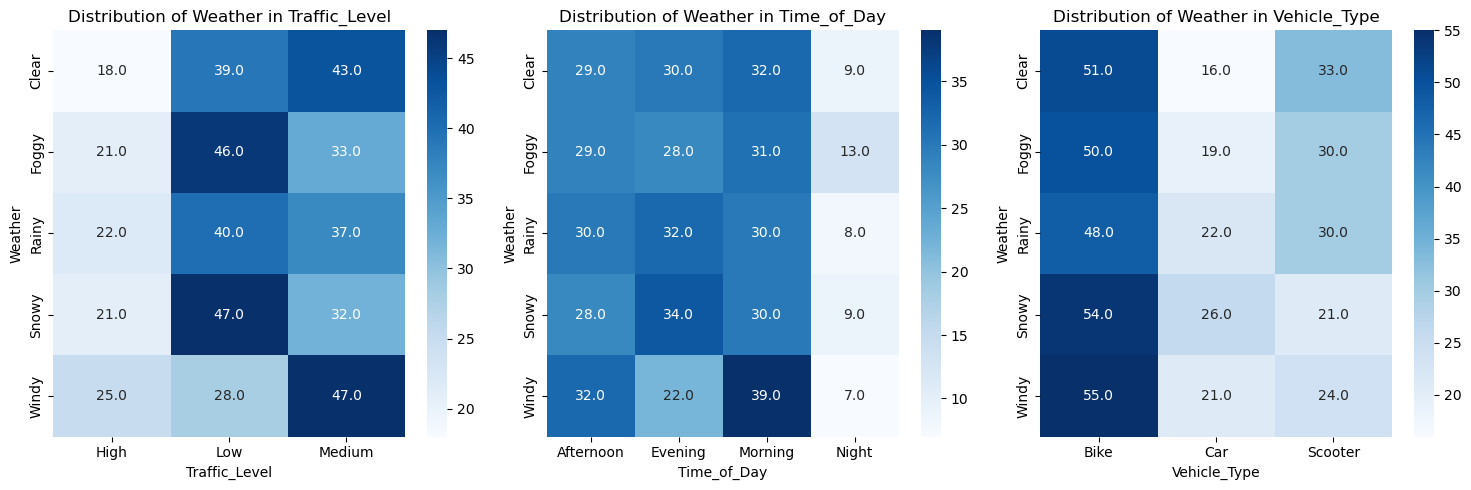

In [81]:
# checking the weather distribution in categorical data distribution
plt.figure(figsize=(15, 5))
for i, col in enumerate(df[object_columns].drop('Weather', axis=1)):
	plt.subplot(1, 3, i+1)
	result = df.groupby('Weather')[col].value_counts().unstack()
	result = result.apply(lambda x: round(x/result.sum(axis=1), 2) * 100)
	sns.heatmap(result, annot=True, fmt='.1f', cmap='Blues')
	plt.title(f'Distribution of Weather in {col}')
plt.tight_layout()
plt.show()

`Traffic_Level`:
- high usually have windy weather
- medium usually has windy / clear
- low usually snowy / windy (makes sense, the driver want to give the food immediately, so low traffic is the best when snowy)

`Time_of_Day`:
- morning stands out, the order is mostly when it is windy
- maybe people often feels hungry when it is windy in the morning!

`Vehicle_type`:
- They use car, when it is snowy (you dont want to get cold, dont ya)
- Scooter is often used when it is clear
- But Bike, they use it in any situation




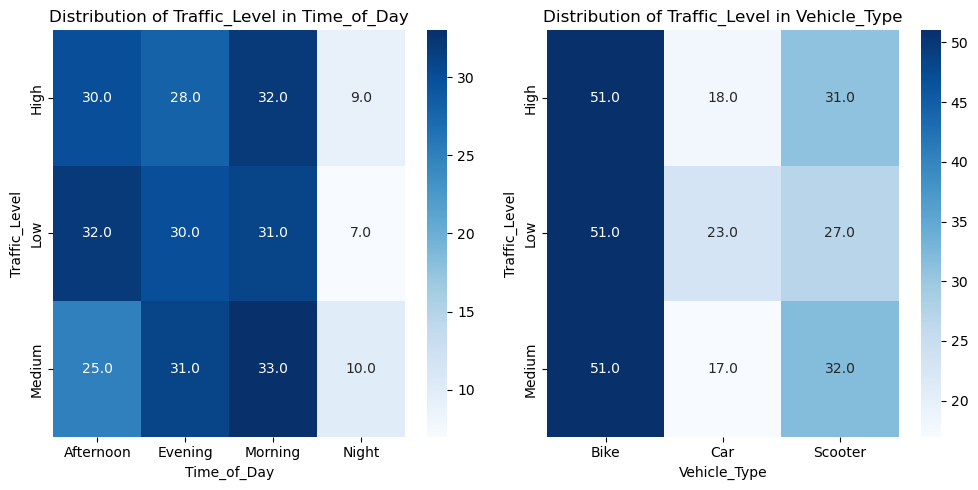

In [82]:
# checking the weather distribution in categorical data distribution
plt.figure(figsize=(15, 5))
for i, col in enumerate(df[object_columns].drop(['Weather', 'Traffic_Level'], axis=1)):
	plt.subplot(1, 3, i+1)
	result = df.groupby('Traffic_Level')[col].value_counts().unstack()
	result = result.apply(lambda x: round(x/result.sum(axis=1), 2) * 100)
	sns.heatmap(result, annot=True, fmt='.1f', cmap='Blues')
	plt.title(f'Distribution of Traffic_Level in {col}')
plt.tight_layout()
plt.show()

`Time_of_day`:
- Night orders are very rare
- On the other times, they distribution is sorta similar
- Afternoon usually low, prolly because not so many people go out
- Morning is mostly Med-High (many people go to work, so rush hour 😌)

`Vehicle_Type`:
- Car mostly used in Low Traffic
- Scooter has faster mobility so suitable for high/med traffic

In [83]:
df_read = df

In [84]:
df_read.columns 

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

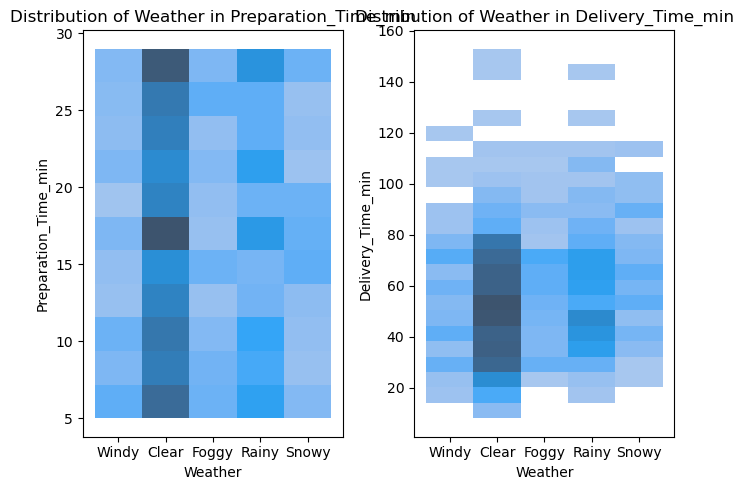

In [85]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(['Preparation_Time_min', 'Delivery_Time_min']):
	plt.subplot(1, 3, i+1)
	sns.histplot(data=df, x='Weather', y=col)
	plt.title(f'Distribution of Weather in {col}')
plt.tight_layout()
plt.show()

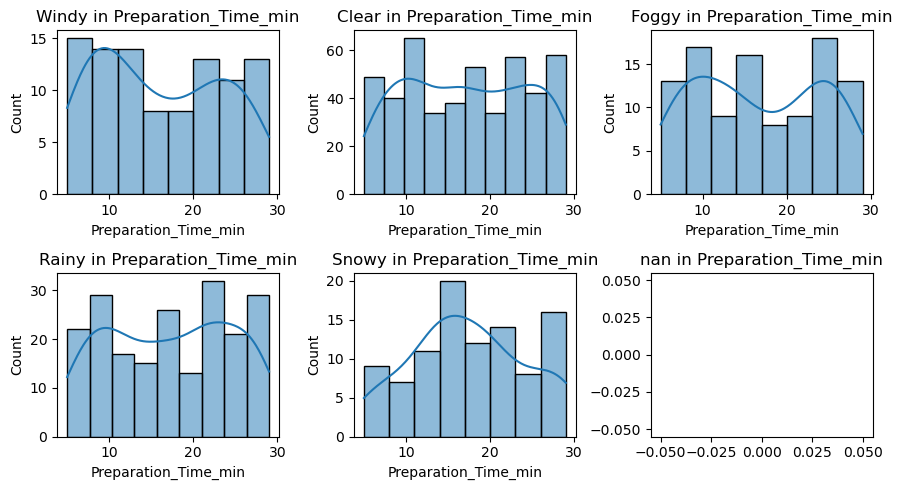

In [88]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df.loc[df['Weather'] == weather, 'Preparation_Time_min']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Preparation_Time_min')
plt.tight_layout()
plt.show()

- Snowy peakes on the middle, while others are bimodal
- Snowy takes lopnger to prepare

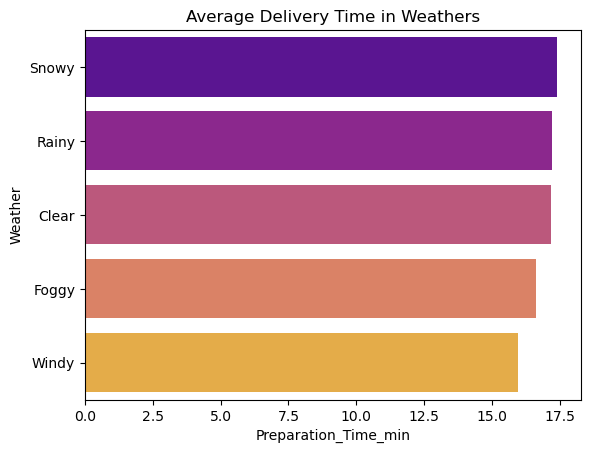

In [103]:
result = df.groupby('Weather')['Preparation_Time_min'].mean().reset_index().sort_values('Preparation_Time_min', ascending=False)
sns.barplot(x=result['Preparation_Time_min'], y=result['Weather'], hue=result['Weather'], palette='plasma')
plt.title('Average Delivery Time in Weathers')
plt.show()

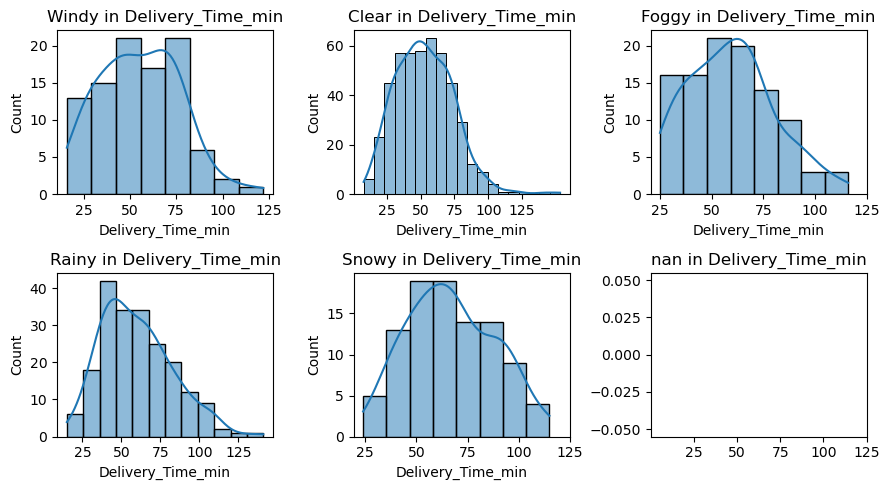

In [95]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df.loc[df['Weather'] == weather, 'Delivery_Time_min']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Delivery_Time_min')
     plt.xticks(range(25, 150, 25))
plt.tight_layout()
plt.show()

- `windy`, `clear` has dilivery time around 25-75 minutes
- `Rainy` and `snowy`, `foggy` diliovery time around 28-75 minutes

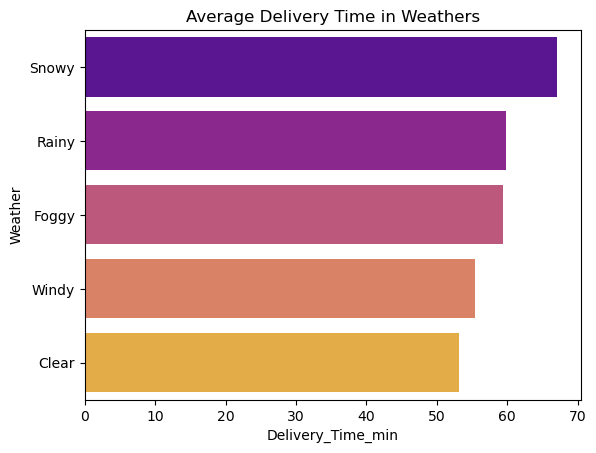

In [102]:
result = df.groupby('Weather')['Delivery_Time_min'].mean().reset_index().sort_values('Delivery_Time_min', ascending=False)
sns.barplot(x=result['Delivery_Time_min'], y=result['Weather'], hue=result['Weather'], palette='plasma')
plt.title('Average Delivery Time in Weathers')
plt.show()

it is right that snowy does take longer to delivery

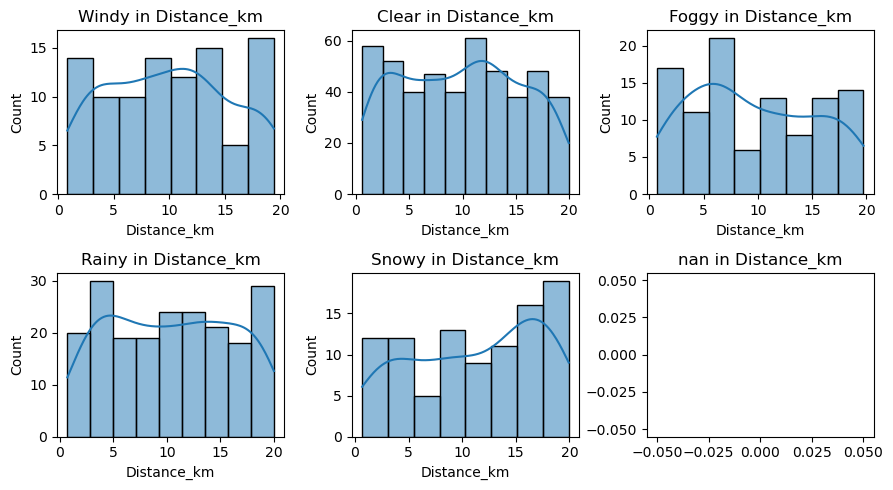

In [105]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df.loc[df['Weather'] == weather, 'Distance_km']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Distance_km')
plt.tight_layout()
plt.show()

- `foggy` has distance **0-5 km**
- `weirdly` `snowy` usually has orders with longer distance, **15-20 km**
- maybe, because there aren't many drivers who accept orders, once they accept, they got long distances, just like how gojek works in Indonesia

In [125]:
df.loc[df['Weather'] == 'Clear', 'Courier_Experience_yrs'].mode().mean().round()

3.0

In [121]:
df.loc[df['Weather'] == 'Windy', 'Courier_Experience_yrs'].mode().mean().round()

4.0

In [122]:
df.loc[df['Weather'] == 'Foggy', 'Courier_Experience_yrs'].mode().mean().round()

1.0

In [123]:
df.loc[df['Weather'] == 'Snowy', 'Courier_Experience_yrs'].mode().mean().round()

3.0

In [124]:
df.loc[df['Weather'] == 'Rainy', 'Courier_Experience_yrs'].mode().mean().round()

6.0

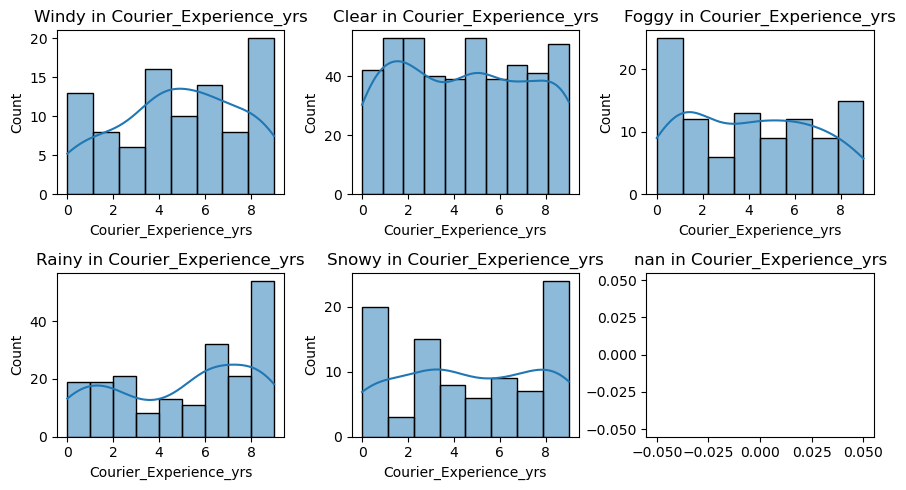

In [106]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df.loc[df['Weather'] == weather, 'Courier_Experience_yrs']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Courier_Experience_yrs')
plt.tight_layout()
plt.show()

In [ ]:
df_read['Courier_Experience_yrs'].value_counts().reset_index()
exp_group = np.linspace(df_read['Courier_Experience_yrs'].min(), df_read['Courier_Experience_yrs'].max(), 4)
zip_exp_group = list(zip(exp_group, exp_group[1:]))
zip_exp_group

for i in range(len(zip_exp_group)):
     start = zip_exp_group[i][0]
     end = zip_exp_group[i][1]
     df_read.loc[(df_read['Courier_Experience_yrs'] > start-1) & (df_read['Courier_Experience_yrs'] <= end), 'Experience_group'] = int(i)
     
     result = df_read['Experience_group'].value_counts().reset_index()
plt.pie(result['count'], labels=result['Experience_group'], autopct='%2.2f%%')
plt.title('Distribution of Experience Group which has more orders')
plt.show()

#couriers with `6-9 years` experience have more orders, maybe many people have validate their performance so the system get them more orders

for group in np.sort(df_read['Experience_group'].unique()):
     result = df_read.loc[df_read['Experience_group'] == group, 'Distance_km']
     sns.histplot(result)
     plt.title(f'Exp group {group} in Distance_km')
     plt.show()

- `Weather`: filled with mode by traffic_level grouping
- `Trafic_Level`: filled with mode by Weather grouping
- `Time_of_day`: filled with mode by Weather grouping
- `Courier_Experience_yrs`: 